In [40]:
import pandas as pd

tagates = pd.read_csv('./data/tagates_nb201_results.csv', index_col=0)
tagates['predictor'] = 'TA-GATES'
graf = pd.read_csv('./data/graf_tagates.csv')

In [41]:
graf = graf[['train_size', 'data_seed', 'tau', 'model']].copy()
graf['predictor'] = 'ZCP + GRAF + ' + graf['model'].str.replace('xgb_tuned', 'XGB+').replace('xgb', 'XGB').replace('rf', 'RF')
graf.drop(columns='model', inplace=True)

In [42]:
graf

,train_size,data_seed,tau,predictor
0,0.20,42.0,0.877584,ZCP + GRAF + XGB+
1,0.20,43.0,0.872885,ZCP + GRAF + XGB+
2,0.20,44.0,0.879098,ZCP + GRAF + XGB+
3,0.20,45.0,0.878937,ZCP + GRAF + XGB+
4,0.20,46.0,0.875434,ZCP + GRAF + XGB+
...,...,...,...,...
595,0.01,87.0,0.756877,ZCP + GRAF + RF
596,0.01,88.0,0.753970,ZCP + GRAF + RF
597,0.01,89.0,0.758074,ZCP + GRAF + RF
598,0.01,90.0,0.749378,ZCP + GRAF + RF


In [43]:
data = pd.concat([graf, tagates], axis=0).reset_index()

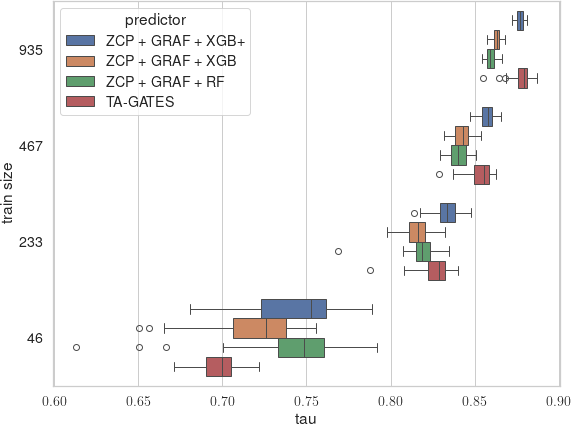

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams.update({'text.usetex': True, 'font.family': 'serif', 'text.latex.preamble': '\\usepackage{times} ', 'figure.figsize': (3.25, 2.0086104634371584), 'figure.constrained_layout.use': True, 'figure.autolayout': False, 'savefig.bbox': 'tight', 'savefig.pad_inches': 0.015, 'font.size': 10, 'axes.labelsize': 10, 'legend.fontsize': 6, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 'axes.titlesize': 8})
sns.set(font_scale=1.3)
sns.set_style('whitegrid')

data['train size'] = (data['train_size'] * 4675).astype(int).astype(str)

plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='tau', y='train size', hue='predictor')
plt.savefig('./data/tagates.pdf')
plt.show()